In [ ]:
# https://datascienceschool.net/view-notebook/ef921dc25e01437b9b5c532ba3b89b02/
# Install system packages 

!pip install geopandas 
!pip install descartes
!pip install mapclassify

In [2]:
# Install fonts and initialize plt-fontsetting

! ./nanum.sh
%run setting4pltfont.py

Hit:1 http://mirror.kakao.com/ubuntu bionic InRelease                      
Hit:2 http://mirror.kakao.com/ubuntu bionic-updates InRelease                  
Hit:3 http://mirror.kakao.com/ubuntu bionic-backports InRelease                
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Fetched 88.7 kB in 1s (78.0 kB/s)   
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (2

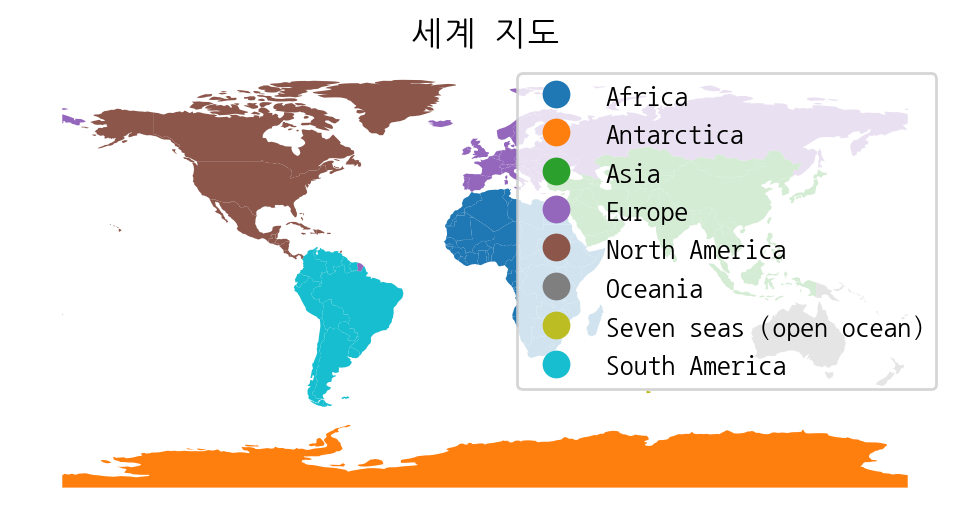

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
gpd.__version__

countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

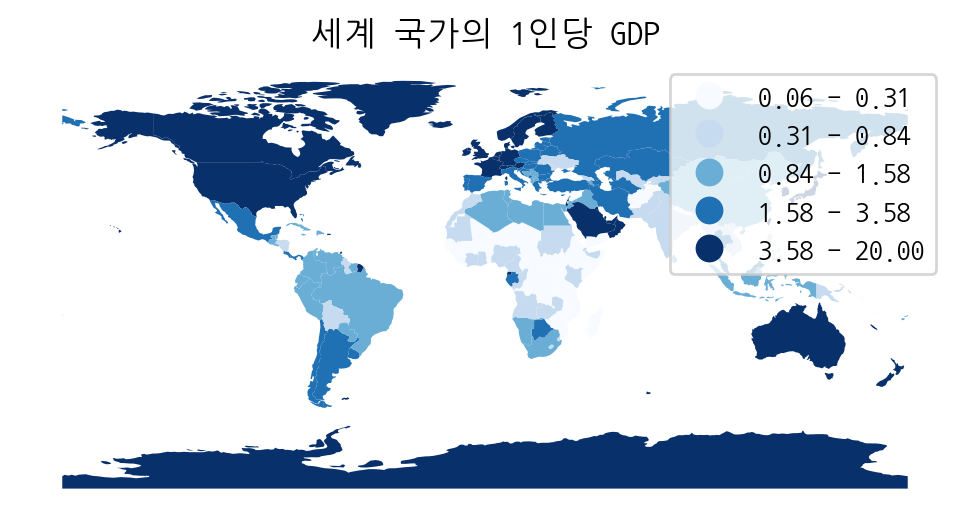

In [4]:
# 1인당 GDP 연산
#!pip install mapclassify
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("세계 국가의 1인당 GDP")
plt.show()

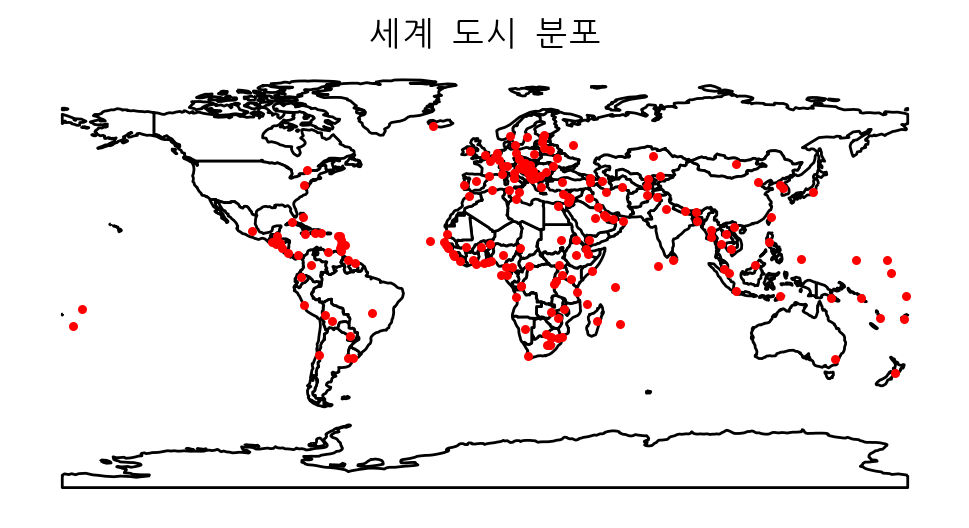

In [5]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

In [ ]:
korea_border = countries[countries.name == "Korea"].geometry
korea_border.boundary.squeeze()